In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

```Simple Linear Regression Using Gradient Descent```
#the relationship between student test scores and hours of study
#Intuitively, there must be a relationship right? The more you study, the better your test scores 

In [2]:
#data = pd.read_excel('flightcosts.xlsx') 


In [3]:
data = np.genfromtxt("../linear_regression_live-master/data.csv", delimiter=",")

In [4]:
data.shape

(100, 2)

In [5]:
data[0:10] #select the first nine rows


array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513],
       [55.14218841, 78.21151827],
       [52.21179669, 79.64197305],
       [39.29956669, 59.17148932],
       [48.10504169, 75.3312423 ],
       [52.55001444, 71.30087989]])

In [6]:
#split dataset into training set(20 percent) and test set (80 percent)
#
x_train = data[0:80,0]
x_test  = data[80:100,0]
y_train = data[0:80,1]
y_test  = data[80:100,1]


In [7]:
[x_train.shape,x_test.shape]

[(80,), (20,)]

In [8]:
x_train[0:10]

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444])

In [9]:
#arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [12]:
y_train[0:10]

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989])

In [13]:
#linear hypothesis where m is slope,b is intercept and x is independent variable
def hypothesis(m,b,x):
    y = m*x + b
    return y


In [14]:
#picking a random model value m = 2.83, b = 1.4
z = hypothesis(2.83,1.4,x_train)

In [15]:
makeplot(x_train,y_train,z)

NameError: name 'makeplot' is not defined

In [16]:

def makeplot(x,y,z):
    plt.scatter(x,y)
    plt.plot(x,z, color='r')
    plt.legend(['distance', 'cost'])
    plt.title('Students Performance')
    plt.xlabel('Amount of Study(hours)')
    plt.ylabel('Test Scores')
    plt.show()

In [17]:
data_train = np.zeros(shape=(80,2))

In [19]:
data_train[0:80,0] = x_train 
data_train[0:80,1] = y_train

In [21]:
data_train[0:10]

array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513],
       [55.14218841, 78.21151827],
       [52.21179669, 79.64197305],
       [39.29956669, 59.17148932],
       [48.10504169, 75.3312423 ],
       [52.55001444, 71.30087989]])

In [22]:
#Compute Cost or Mean Squared Error 
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [23]:
#hypothesis 

In [24]:

#to calculate gradient descent of a given line

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [25]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [26]:
#main method<>

learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, data_train)))
print("Running...")
[b, m] = gradient_descent_runner(data_train, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, data_train)))

Starting gradient descent at b = 0, m = 0, error = 5374.779987075437
Running...
After 1000 iterations b = 0.06204283002622393, m = 1.4593027999610804, error = 115.1678032425821


In [27]:
z = hypothesis(1.390043942673587,0.01983309670475249,x_train)

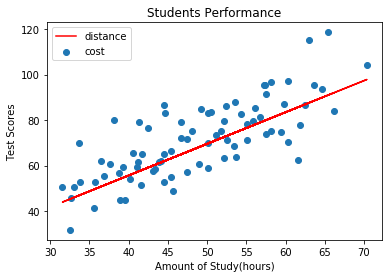

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,z, color='r')
plt.legend(['distance', 'cost'])
plt.title('Students Performance')
plt.xlabel('Amount of Study(hours)')
plt.ylabel('Test Scores')
plt.show()
